# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [2]:
import numpy as np

def f(r):
    x, y = r
    z = ((1-x)**2) + (100*(y-(x**2))**2)
    return z
    
def grad(r):
    x, y = r
    del_x = (2*x) - 2 + (400*x*(x**2 - y))
    del_y = 200 * (y-(x**2))
    return np.array([del_x, del_y])

Before proceeding, ensure that your functions have been written correctly:

In [3]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [4]:
import numpy as np

def gradientDescent(df, r0, eta, nstep):
    x,y = r0
    history = numpy.empty( (nstep+1, 2) )
    current = r0
    history[0] = current
    for i in range(1, nstep+1):
        new = current - ((eta) * df(current))
        history[i] = new
        current = new
    return history

Test your answer:

In [5]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

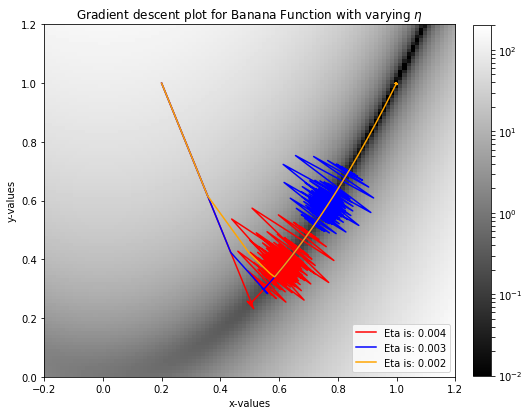

In [6]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)

# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point


############################

number_of_steps = 50000
colours = ['Red', 'Blue', 'Orange']

for i in range (0, len(gammas)):
    values_generated = gradientDescent(grad, r0, gammas[i], number_of_steps)
    plt.plot(values_generated[:,0],values_generated[:,1], color = colours[i], label = 'Eta is: ' + str(gammas[i]))

    
plt.xlim(x0, x1)
plt.ylim(y0, y1)

plt.title('Gradient descent plot for Banana Function with varying $\eta$')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.legend(loc = 'lower right')

plt.show()

Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]




Although both the plots with $\eta$ $= 0.004$ and $\eta$ $= 0.003$ originally head into the valley in which the global minima is located, they both begin oscillatory motions at approximately 165 steps ($\eta$ $= 0.004$) and 535 steps ($\eta$ $= 0.003$) - this causes them to oscillate continually and vigorously into and out of the valley.  However, the $\eta$ $= 0.002$ descent stays within the valley and continues to towards the global minima at (1,1).  Eventually, the $\eta$ $= 0.002$ descent will begin oscillating (from preliminary testing, this occurs at approximately 16,000) but this oscillation occurs over a very small range that is not visible by eye on the plot (checked up to 200,000 steps).

Therefore, as the orange ($\eta$ $= 0.002$) plot leads to the global minima without large relative oscillatory motions, it is the best value to choose in order to find the global minima.